## Testing Accuracy of Off-the-shelf Implementation

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
from surprise import SVDpp
from surprise import Dataset
from surprise.model_selection import KFold
from surprise import accuracy

In [11]:
kf = KFold(n_splits=10)
trainset, testset = kf.split(data).__next__()

# train and test algorithm.
algo = SVDpp()
algo.fit(trainset)
predictions = algo.test(testset)

# Compute and print Root Mean Squared Error
accuracy.rmse(predictions, verbose=True) / 2

RMSE: 0.9119


0.45596710996338774

## Training on Full Dataset

In [12]:
data = Dataset.load_builtin('ml-100k')
trainset = data.build_full_trainset()
algo = SVDpp()
algo.fit(trainset)

In [13]:
# OTS means off the shelf
U = algo.pu
V = algo.qi
a = algo.bu
b = algo.bi

In [16]:
A, Sigma, Bt = svd(V.transpose())
V_tilde = np.matmul(A[:,:2].transpose(), V.transpose())
U_tilde = np.matmul(A[:,:2].transpose(), U.transpose())
V_x = V_tilde[0]
V_y = V_tilde[1]
U_x = U_tilde[0]
U_y = U_tilde[1]

## Visualizations

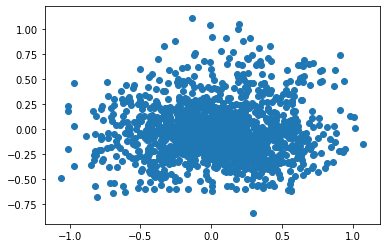

In [17]:
plt.scatter(V_x, V_y)

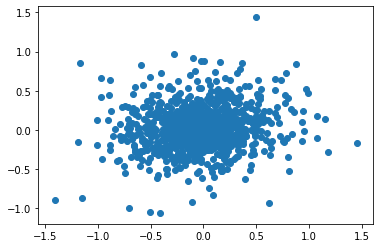

In [18]:
plt.scatter(U_x, U_y)